##### AIM Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd


In [2]:
data =pd.read_csv("HousingData.csv")

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#1. CRIM             - per capita crime rate by town
##3. INDUS            - proportion of non-retail business acres per town.
#4. CHAS             - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#5. NOX              - nitric oxides concentration (parts per 10 million)
#6. RM               - average number of rooms per dwelling
#7. AGE              - proportion of owner-occupied units built prior to 1940
#8. DIS              - weighted distances to five Boston employment centres
#9. RAD              - index of accessibility to radial highways
#10. TAX             - full-value property-tax rate per 10,000 dollars.
#11. PTRATIO         - pupil-teacher ratio by town
#12. B               - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#13. LSTAT           - % lower status of the population
#14. MEDV            - Median value of owner-occupied homes in 1000's dollars

In [5]:
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [6]:
data.tail(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


In [10]:
X = data[["RM"]]
Y = data[["MEDV"]]

<Axes: xlabel='RM', ylabel='MEDV'>

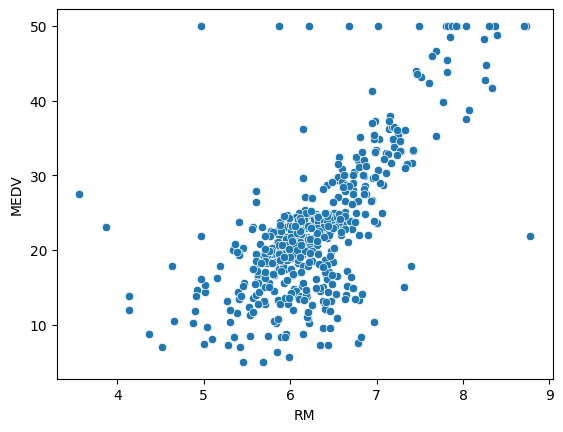

In [11]:
from seaborn import scatterplot
scatterplot(x=X['RM'], y=Y['MEDV'])

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [14]:
b1 = model.coef_

In [15]:
b0 = model.intercept_

In [16]:
b0 

array([-32.50208764])

In [17]:
b1

array([[8.7592759]])

<Axes: xlabel='RM', ylabel='MEDV'>

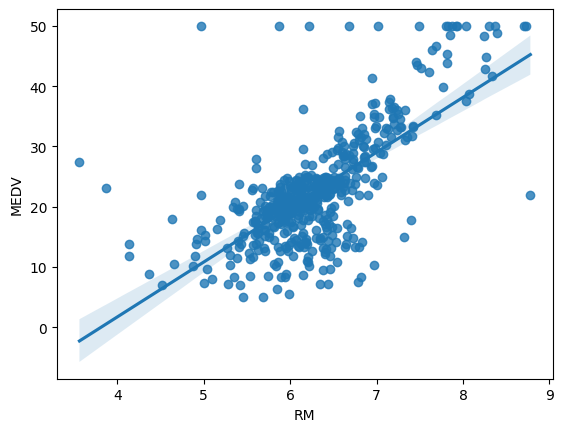

In [18]:
from seaborn import regplot
regplot(x=X['RM'], y=Y['MEDV'])

In [19]:
pred = model.predict(xtest)

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

4.390858334830963

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred)

35.373063874559925

In [22]:
##### As per the result our model is not very good for predicting housing prices.
###one can improve the prediction result using many other possible machine learning algorithms and technique 

In [23]:
print(ytest) #####actual value

     MEDV
61   16.0
488  15.2
303  33.1
433  14.3
247  20.5
..    ...
19   18.2
161  50.0
76   20.0
288  22.3
259  30.1

[102 rows x 1 columns]


In [24]:
print(pred)

[[19.75575238]
 [15.27100312]
 [28.65517669]
 [23.87261205]
 [22.03316411]
 [20.13240124]
 [16.52357957]
 [34.15600196]
 [20.99956956]
 [18.99369538]
 [21.76162656]
 [27.490193  ]
 [23.59231522]
 [22.08571977]
 [31.32675584]
 [19.41414062]
 [19.9309379 ]
 [19.75575238]
 [26.15002379]
 [27.28872965]
 [28.93547352]
 [ 5.75842949]
 [22.38353515]
 [32.25523909]
 [23.32077767]
 [11.60962579]
 [30.37199477]
 [27.91063824]
 [15.84911533]
 [ 8.24606385]
 [26.61426541]
 [19.90466007]
 [28.31356493]
 [24.57335412]
 [21.49008901]
 [26.90332151]
 [18.96741755]
 [31.21288526]
 [31.94866443]
 [23.84633423]
 [23.92516771]
 [21.3849777 ]
 [24.52079847]
 [23.82881567]
 [21.48132973]
 [25.99235682]
 [20.1849569 ]
 [18.81850986]
 [24.26677947]
 [16.30459768]
 [26.728136  ]
 [23.82881567]
 [18.45937955]
 [24.76605819]
 [19.35282569]
 [21.47257046]
 [27.00843282]
 [17.9688601 ]
 [15.26224384]
 [21.57768177]
 [22.69010981]
 [19.07252886]
 [17.53965558]
 [28.53254683]
 [25.95731972]
 [20.89445825]
 [25.26533